# Architect

# Learning Objectives:   
- Be able to describe the foundational components of a neural network.  
- Be able to introduce the keras sequential model api.  
- Be able to learn how to select a model architecture.  
Neural networks are the most powerful modeling techniques in ML today. Despite the hype, they are just tools with their own strengths and weaknesses.  
They're useful, but not a silver bullet, and not always preferable to simpler machine learning methods.  
The goal of this week is to familiarize you with the fundamental theory, terminology, and some libraries that will enable you to build and use neural network architectures.

# Foundational Neural Network Components

## Major Components  
- Neurons
- Weight and Bias parameters  
- Activation Function  
- Loss Function  
- Layers: collections of neurons with the same inputs.  
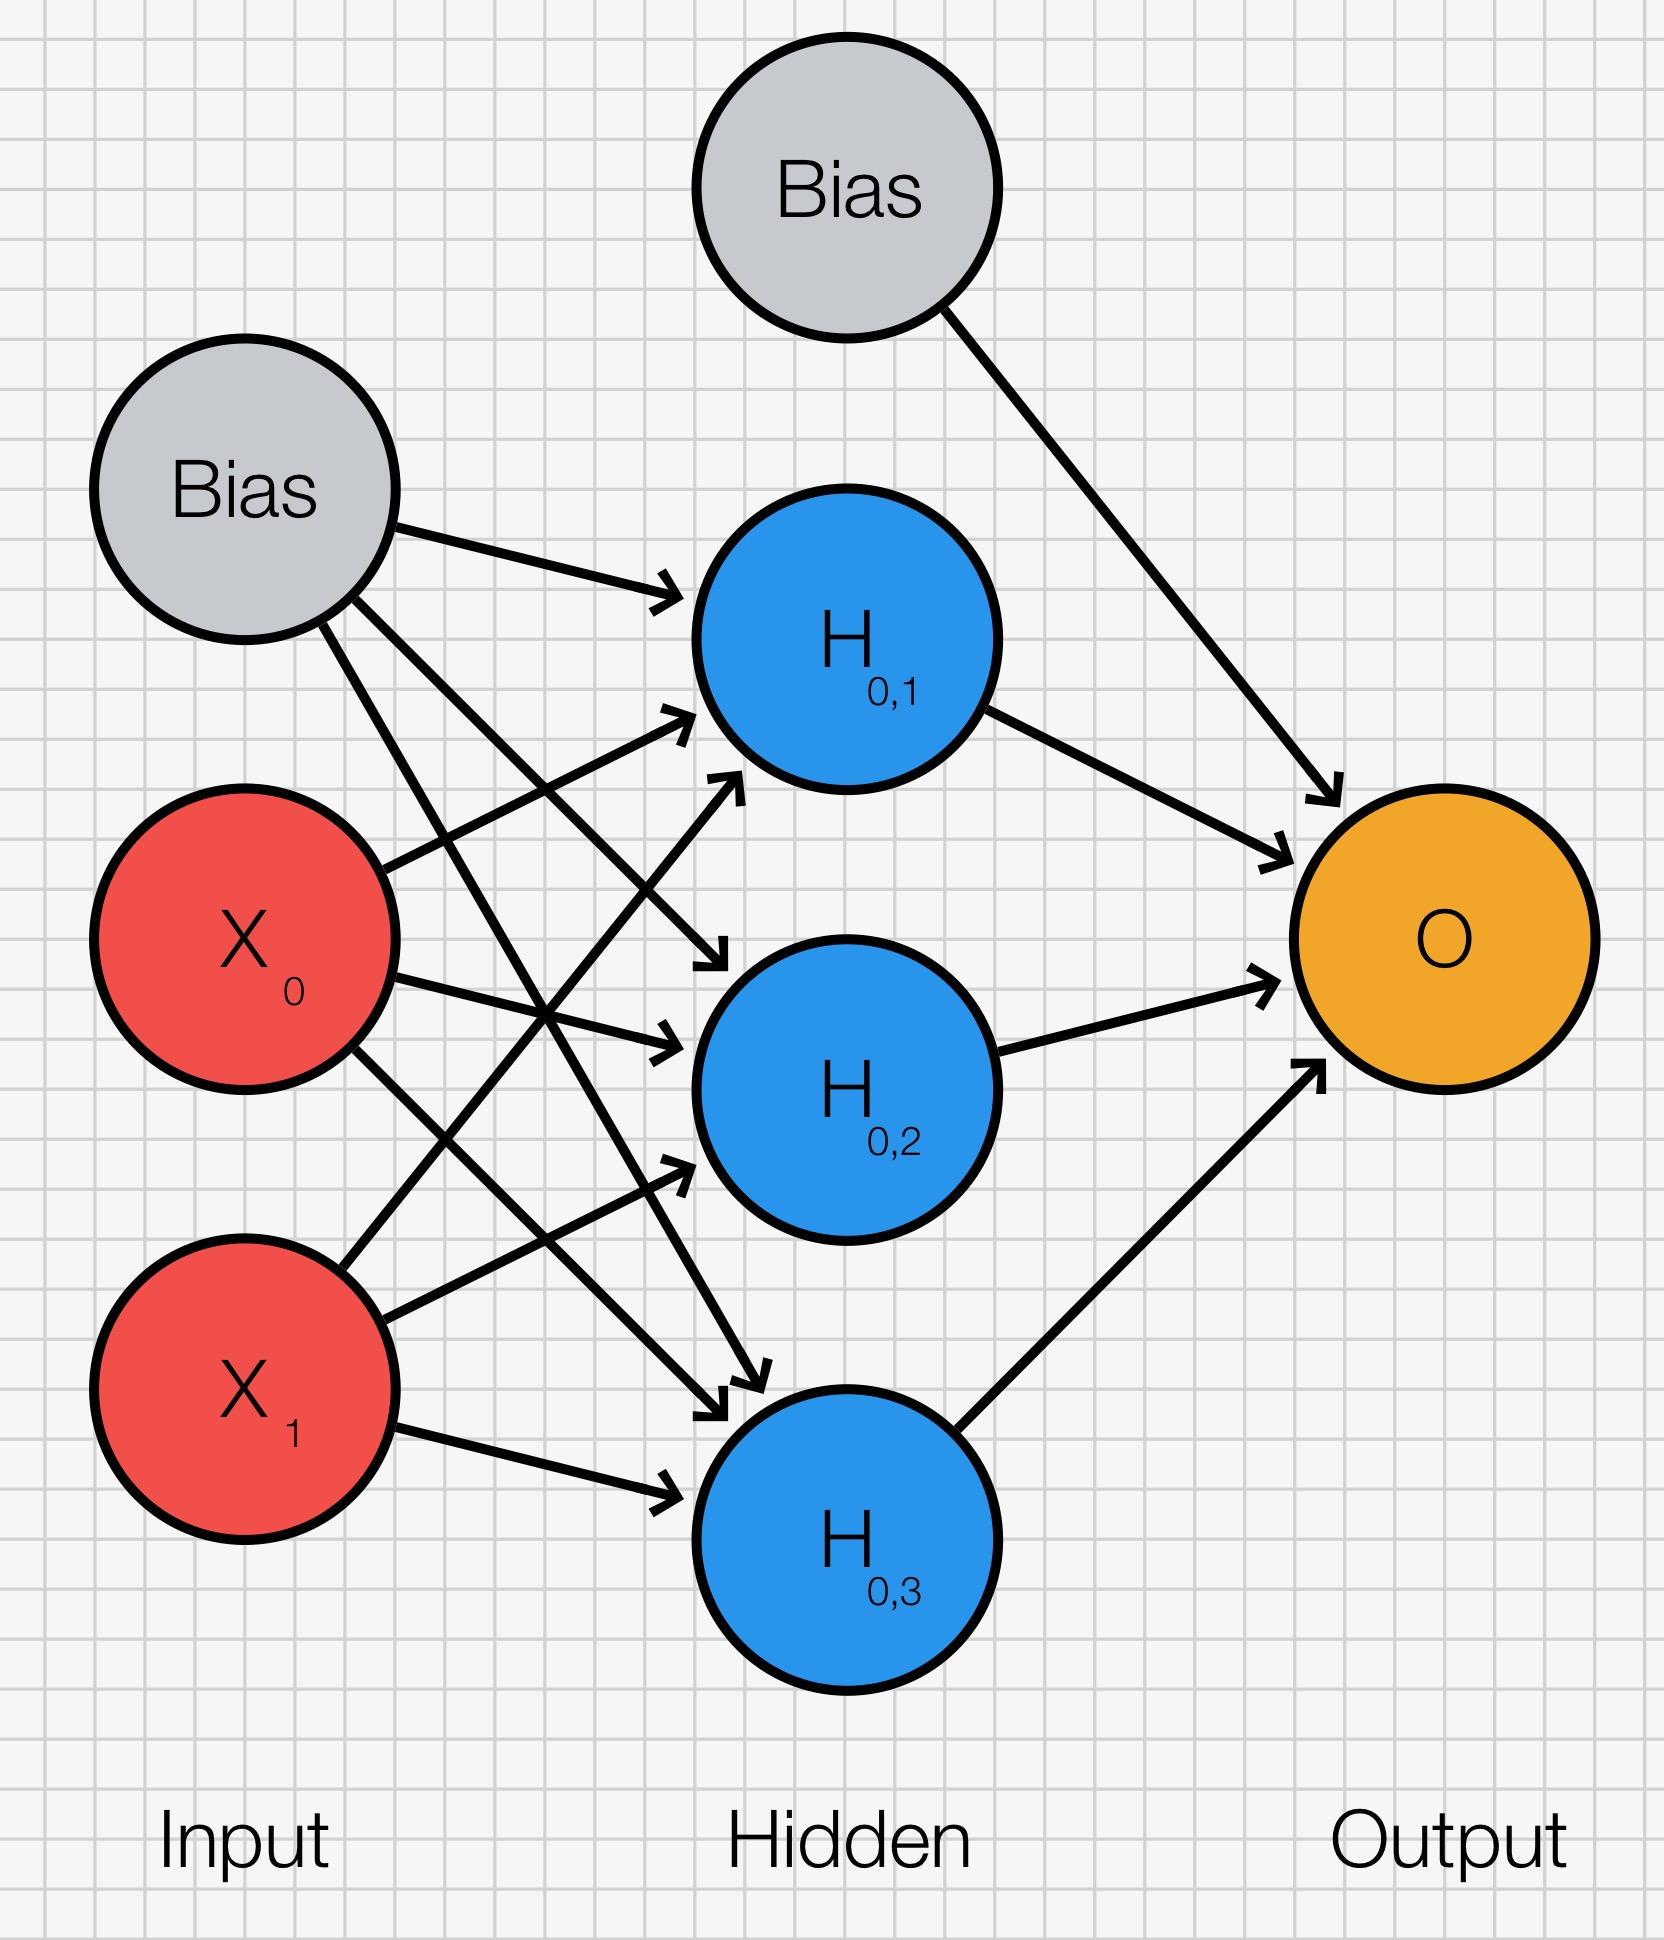  
Let's zoom in on the first of these components, the neuron. 

# Dissecting the Artificial Neuron (AKA, the perceptron)  
Every branch of science has a fundamental unit, a baseline model of a physical system that is used as the starting point of that science. Everything rests on the building block of that science, unless you're doing theoretical work to discover a new building block or challenge the first principles. So it's important that we understand the building block of any science we wish to study. In physics, we have the particle. Chemistry? Chemical element. Biology? Cell. What we are learning here is computational neuronscience. Below is a side-by-side comparison of a biological model of a neuron and a computational model of a neuron.  
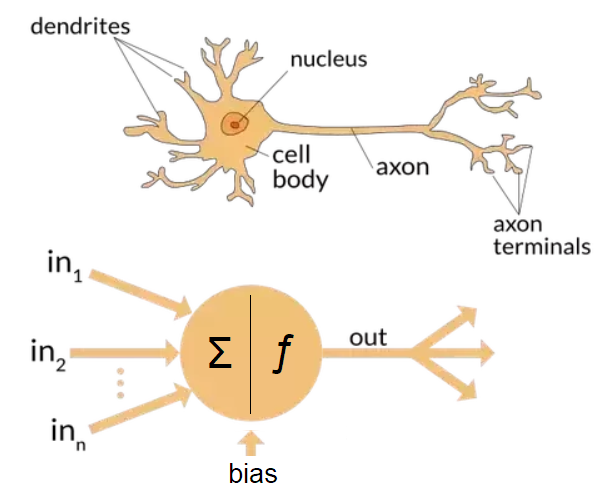   
Let's dive deeper into the computational model of the neuron.  

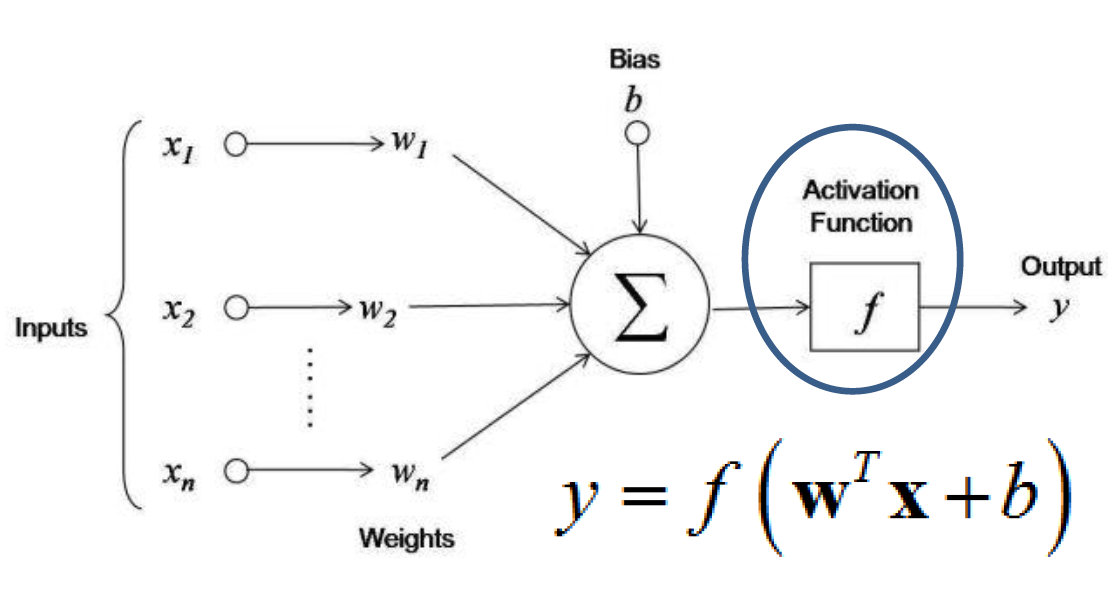  
Note: The T superscript on the w weight vector stands for a vector/matrix transpose. Sometimes these are necessary in order to get the dimensions of a vector or matrix product to align so that a valid product can take place.  
This is the neuron in a single equation, all the relevant terms are present. This equation will continue to reappear as we study various neural network architectures, as well as the techniques for training neural networks such as gradient descent and back-pagation.  
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mi>y</mi>
    <mo>=</mo>
    <mi>f</mi>
    <mo stretchy="false">(</mo>
    <mrow data-mjx-texclass="ORD">
      <msup>
        <mi mathvariant="bold">w</mi>
        <mi mathvariant="bold">T</mi>
      </msup>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="bold">x</mi>
    </mrow>
    <mo>+</mo>
    <mi>b</mi>
    <mo stretchy="false">)</mo>
  </mrow>
</math>  
In this equation, f is the activation function of the neuron.  
x is a column vector of the inputs to the neuron (i.e features)  
The neuron is characterized by a column vector of weights w, and a bias b.  
The expression w^Tx+b is the signal from the neuron.  
Here, wT is the transpose of the weights vector-- recall that the transpose of a column vector is a row vector.  
The signal is a weighted average of the inputs {x1, x2, ..., xn} plus a bias term b.  
Signal = weight1*input1 + weight1*input2 + weight3*input3 + bias  
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mi>y</mi>
  </mrow>
  <mo>=</mo>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>w</mi>
    <mn>0</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mn>1</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mn>2</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mn>2</mn>
  </msub>
  <mo>+</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
</math>  

# Mathematics of vector-vector and matrix-vector dot products

In this section we'll review vector-vector and matrix-vector multiplication.  
As an application, we'll develop the mathematical machinery to create a perceptron model and understand its operation.

## Define some terms and notation  
Let X be defined as the set of all vectors in an N dimensional vector space denoted as R^N.  
Let x be a vector eX  
here, e means "is a member of"  
Let W be defined as the set of all weight vectors in R^N.  
let w be a vector eW.  
Let b be a scalar on the real line, denoted by R1, or just R.  
In all the work to follow in this course, we will strive to follow standard notation:  
- matrix variables by bold capital letters X  
- vector variables by bold lowercase letters  
- scalar variables by plain lower case letters  

## Representing a neuron's input and parameters   
- We'll specialize to a toy example in two dimensions.  
- suppose we have three examples (data points) {x1, x2, x3}, and each is a two-dimensional row vector.  
- We can stack these input vectors into a 3x2 input matrix X.   
- The neuron's weights vector always has the same dimension as the input vector, so it is also two-dimensional.  
- The neuron's bias b is a scalar.  
- Let's create code for our example:

In [3]:
# although the math holds up for any feature dimensionality,
# let's start with n = 2 dimensional input vectors for simplicity.  
import numpy as np
# define our 2d input vectors and input matrix.
x1 = np.array([10, 20])
x2 = np.array([-10, -20])
x3 = np.array([100, 111])
# stack the input vectors to form the input matrix.
X = np.array([x1,
             x2,
             x3])
# define our 2d weight vector
w = np.array([0.2, 0.4])
# define our bias term
b = 1

In [5]:
# input matrix X
X

array([[ 10,  20],
       [-10, -20],
       [100, 111]])

In [6]:
# weights vector w
w

array([0.2, 0.4])

In [8]:
# scalar bias b
b

1

## The dot product of two vectors  
The dot product of two vectors is the sum of the products of their corresponding components.  
Example: let
   <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext mathvariant="bold">a</mtext>
  <mo>=</mo>
  <mo stretchy="false">[</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mn>2</mn>
  <mo>,</mo>
  <mn>3</mn>
  <mo stretchy="false">]</mo>
</math><math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext mathvariant="bold">b</mtext>
  <mo>=</mo>
  <mo stretchy="false">[</mo>
  <mn>5</mn>
  <mo>,</mo>
  <mn>6</mn>
  <mo>,</mo>
  <mn>7</mn>
  <mo stretchy="false">]</mo>
</math>.  
Then <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext mathvariant="bold">a</mtext>
  <mo>&#x22C5;</mo>
  <mtext mathvariant="bold">b</mtext>
  <mo>=</mo>
  <mn>1</mn>
  <mo>&#xD7;</mo>
  <mn>5</mn>
  <mo>+</mo>
  <mn>2</mn>
  <mo>&#xD7;</mo>
  <mn>6</mn>
  <mo>+</mo>
  <mn>3</mn>
  <mo>&#xD7;</mo>
  <mn>7</mn>
  <mo>=</mo>
  <mn>5</mn>
  <mo>+</mo>
  <mn>12</mn>
  <mo>+</mo>
  <mn>21</mn>
  <mo>=</mo>
  <mn>38</mn>
</math>.  

Note that the dot product of two vectors is just a single number, or a scalar. In python, we can compute the dot product like so: np.dot(a, b).

In [9]:
# to compute the dot product between vectors a and b:
# multiply element-wise, then sum
a = np.array([1, 2, 3])
b = np.array([5, 6, 7])
print(np.dot(a, b))

38


The dot product between an input vector x and a weight vector w can be thought of as a weighted sum of the input vectors' components:  
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mstyle displaystyle="true">
      <mrow data-mjx-texclass="ORD">
        <mi mathvariant="bold">w</mi>
      </mrow>
      <mo>&#x22C5;</mo>
      <mrow data-mjx-texclass="ORD">
        <mi mathvariant="bold">x</mi>
      </mrow>
    </mstyle>
  </mrow>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mo>=</mo>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mrow data-mjx-texclass="ORD">
    <mstyle displaystyle="true">
      <munderover>
        <mo data-mjx-texclass="OP">&#x2211;</mo>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mrow data-mjx-texclass="ORD">
          <mi>m</mi>
        </mrow>
      </munderover>
      <msub>
        <mi>w</mi>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
        </mrow>
      </msub>
      <msub>
        <mi>x</mi>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
        </mrow>
      </msub>
    </mstyle>
  </mrow>
</math>

## a bit of pythonic weirdness explained

1D vect vs. 2D row vect vs 2D column vect.

In [10]:
# one dimensional vector
print(f'w looks like this {w} and is a one-dimensional vector and has shape {w.shape}\n')

# reshape w to a two-dimensional row vector!
print(f'w.reshape(1,2) looks like this {w.reshape(1,2)} and is a two-dimensional array, a row vector (1 row,2 columns) with shape {w.reshape(1,2).shape}\n')

# check out this strange alternative way to reshape!
print(f'w[None,:] also looks like this {w[None,:]} and is a two-dimensional array, a row vector with shape {w[None,:].shape}\n')

# reshape w to a two-dimensional column vector!
print(f'w.reshape(2,1) looks like this\n {w.reshape(2,1)} \n and is a two-dimensional array, a column vector, with shape {w.reshape(2,1).shape}\n')

# check out this strange alternative way to reshape!
print(f'w[:,None] also looks like this \n {w[:,None]} \n and is a two-dimensional array, a column vector, with shape {w[:,None].shape}\n')


w looks like this [0.2 0.4] and is a one-dimensional vector and has shape (2,)

w.reshape(1,2) looks like this [[0.2 0.4]] and is a two-dimensional array, a row vector (1 row,2 columns) with shape (1, 2)

w[None,:] also looks like this [[0.2 0.4]] and is a two-dimensional array, a row vector with shape (1, 2)

w.reshape(2,1) looks like this
 [[0.2]
 [0.4]] 
 and is a two-dimensional array, a column vector, with shape (2, 1)

w[:,None] also looks like this 
 [[0.2]
 [0.4]] 
 and is a two-dimensional array, a column vector, with shape (2, 1)



## The dot product of a matrix and a vector

If X is an m * n matrix and w is an n * 1 column vector,  
Then the matrix-vector product X * w is an m * 1 column vector  
whose entries are the dot products of each row of X with w.   
Note that the first and second dimensions of the matrix-vector product are:  
The first dimension of the matrix and the second dimension of the vector.  
Here m refers to the number of examples and n refers to the number of features, i.e. the dimensionality of each input example. 

## The numpy.dot() method is overloaded to handle the product of a matrix with a vector.  
Caveat: when the .dot method is used this way, the result is a vector, not a scalar.

In [11]:
# the dot product of matrix X with column vector w
np.dot(X, w)

array([ 10. , -10. ,  64.4])

## Alternatively, we can use python's @ operator for matrix multiplication  
To compute the product of two matrices A@B, we must make sure that A and B have the right shapes.  
For example, to compute X@w, we must cast (reshape) w as a two-dimensional column array.  
Note that the result vector is the same list of numbers as the previous answer:

In [12]:
X@w[:, None]

array([[ 10. ],
       [-10. ],
       [ 64.4]])

# A perceptron is a mathematical model of the neuron  
A neuron takes in a number of inputs through its dendrites. Depending on its sensitivity to each of the inputs, the neuron responds by either firing or not firing along the axon. We can model this process in code!  
The inputs to the neuron are real numbers, and the neuron generates an output that is either ON (fires) or OFF (doesn't fire). The inputs for a single example can be described by a vector x. The neuron has internal weights w describing its sensitivity to each input an also a bias b describing its overall sensitivity. We can think of the neuron as performing three steps to generate its binary output.

## Step 1: The neuron combines the inputs linearly to create a response.  
Z = w * x + b  
Here, Z is the response, a real number that can be either positive or negative: <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>Z</mi>
  <mo>&#x2208;</mo>
  <mo stretchy="false">[</mo>
  <mo>&#x2212;</mo>
  <mi mathvariant="normal">&#x221E;</mi>
  <mo>,</mo>
  <mo>+</mo>
  <mi mathvariant="normal">&#x221E;</mi>
  <mo stretchy="false">]</mo>
</math>  
The neuron ultimately needs to convert the response to a decision whether or not to fire, i.e. a binary output of either 0 or 1. Hence:

## Step 2: The neuron compresses Z down to a number between 0 and 1.

We'll need a special function S to do this job for us. So for now, let's think about what we want S to do:  
S(Z) maps any real number Z onto the unit interval so that:  
S(Z) = z, where z e[0, 1]  
We'll have more to say about S in a bit. 

## Step 3: The neuron maps the number z to a binary output e{0, 1}  
How would the neuron do this? We can imagine applying a threshold (say 0.5) to produce a result:  
if z is greater than 0.5: return 1
else z is less than 0.5: return 0.

## Summary of the perceptron model

1. Map the vector input x to a linear response Z = w * x + b  

2. Map Z to a number between 0 and 1  

3. Apply a threshold to z to produce a binary output of either 0 or 1.  

The perceptron output (0 or 1) can be expressed in terms of:  
- the inputs x,  
- the neuron's internal parameters (weights w and bias b),  
- the activate function S  
output = S(w * x + b) > 0.5  
Where S is the sigmoid function.  

We are now close to a complete understanding of the perceptron! The only missing piece is a discussion of the sigmoid function, which follows in the next sections.

## Linear Response of a neuron

A neuron's linear response is the weighted sum of the inputs plus the bias:  
Z = w * x + b  
Let's code up the linear response function.

In [14]:
def Z(X, w, b):
    # combine the inputs, weights, and bias to compute a linear response.
    # reshape w into a column vector of shape [len(3), 1]
    w = w.reshape((len(w), 1))
    return X@w + b

Try it out and see what Z looks like. Note that the output of a neuron given an input data point (or example is a single number).  
Here Z is a column vector, giving the neuron outputs for each of the three input examples.  

In [15]:
Z(X, w, b)

array([[15. , 16. , 17. ],
       [-5. , -4. , -3. ],
       [69.4, 70.4, 71.4]])

## The sigmoid function  
The sigmoid function:  
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>S</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mn>1</mn>
      <mo>+</mo>
      <mi>e</mi>
      <mi>x</mi>
      <mi>p</mi>
      <mo stretchy="false">(</mo>
      <mo>&#x2212;</mo>
      <mi>x</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </mfrac>
</math>  
does the job we referred to earlier:  
S maps a real number x onto the unit interval [0, 1].  
The sigmoid is an example of an activation function-- which is a nonlinear function applied to a neuron's linear response Z to compute the output. Activation functions are an essential component of every neural network, and there are a variety of others aside from sigmoid. We'll encounter others later on.  

In [18]:
def sigmoid(x):
    '''Calculate the output of a sigmoid
    input can be a scalar or an array.
    if the input is an array, the outpus will be an array of the same size
    whose values are the sigmoid of each input element.'''
    return 1 / (1 + np.exp(-x))

In [19]:
sigmoid(11)

0.999983298578152

In [20]:
sigmoid(0)

0.5

In [21]:
sigmoid(Z(X, w, b))

array([[0.99999969, 0.99999989, 0.99999996],
       [0.00669285, 0.01798621, 0.04742587],
       [1.        , 1.        , 1.        ]])

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mstyle displaystyle="true">
      <mi>S</mi>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo stretchy="false">)</mo>
      <mo>=</mo>
      <mrow data-mjx-texclass="ORD">
        <mfrac>
          <mn>1</mn>
          <mrow>
            <mn>1</mn>
            <mo>+</mo>
            <msup>
              <mi>e</mi>
              <mrow data-mjx-texclass="ORD">
                <mo>&#x2212;</mo>
                <mi>x</mi>
              </mrow>
            </msup>
          </mrow>
        </mfrac>
      </mrow>
    </mstyle>
  </mrow>
</math>  

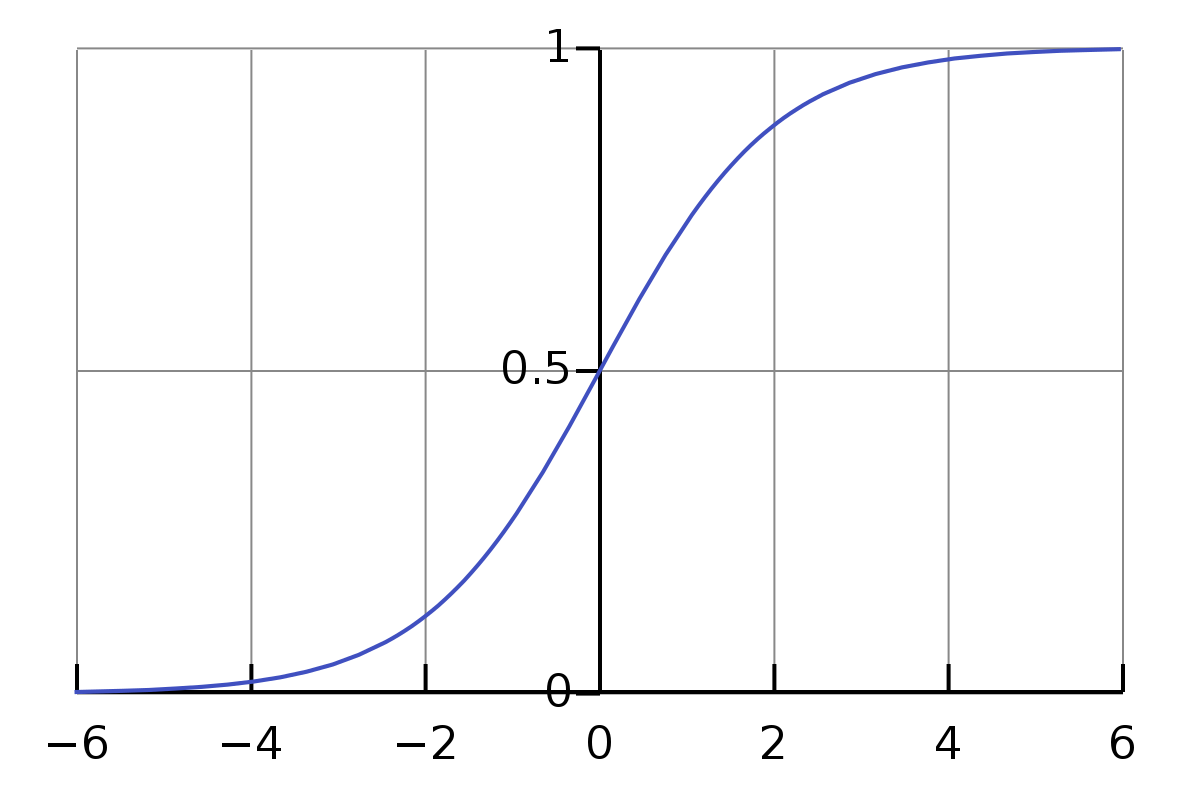

## The output of the neuron  
We can now compute the final outputs of the neuron for our data set of three examples by applying a threshold to the sigmoid result, producing a boolean value.  
If we set the threshold value to 0.5, then we get an output of 1 for positive Z values, and an output of 0 for negative Z values. See the graph of the sigmoid function above. 

In [22]:
# the neuron fires whenever the linear response (input to the sigmoid)
# is positive.
# the neuron does not fire whenever the linear response is negative.
threshold = 0.5
output = sigmoid(Z(X, w, b)) > threshold
output

array([[ True,  True,  True],
       [False, False, False],
       [ True,  True,  True]])

## Implement the perceptron model of the neuron in code  
You now understand the perceptron model of the neuron, which is the simplest example of a neural network. Think of perceptrons as the lego bricks for building more complex neural networks.  
Let's stitch our results together and code up a perceptron model.  
As we'll see in the code, the perceptron is composed of a sequence of mathematical operations, each one acting upon the result of the previous one. For that reason, perceptrons (and neural networks composed of them) are often referred to as feed-forward neural networks since the data "feeds forward", i.e. flows from left to right through the network as it is processed by successive operations.

In [23]:
# implement the perceptron model
def perceptron(w, X, b):
    '''calculates the sigmoid of a weighted sum plus a bias term
    w * x + b and returns a classification for the input data
    (i.e. a prediction).
    Returns a 1 is sigmoid is greater than the threshold
    Returns a 0 is sigmoid is less than the threshold.
    Parameters:
    w: numpy array
        weight vector
    X: numpy 2D array
        input data, one row for each example
    b: scalar (i.e. constant)
        bias term
    Returns: boolean value'''
    # 1. reshape w into a column vector of shape [len(w), 1]
    w = w.reshape((len(w), 1))
    # 2. compute the linear response of the neuron
    Z = X@w + b
    # 3. apply the sigmoid function to the linear response to get a
    # number between 0 and 1.
    z = sigmoid(Z)
    # 4. set the threshold
    threshold = 0.5
    # 5. apply the threshold to determine if the neuron fires or not.  
    output = z > threshold
    return output

In [25]:
# calculate perceptron output for the inputs, weights, and biases
perceptron(w, X, b)

array([[ True,  True,  True],
       [False, False, False],
       [ True,  True,  True]])

In [26]:
b

array([5, 6, 7])

In [27]:
# what happens if we make the bias large and positive?
b = 70
perceptron(w, X, b)

array([[ True],
       [ True],
       [ True]])

In [28]:
# what happens if we make the bias large and negative?
b = -70
perceptron(w, X, b)

array([[False],
       [False],
       [False]])

## What kind of predictive model is the perceptron?  
The perceptron is a linear binary classifier- just like logistic regression.  
Binary in the sense that it can only distinguish two different classes in a classification task.  
Linear in the sense that it can only separate two classes that have a linear decision boundary.  
By combining multiple neurons into a neural network, we can overcome both of these limitations.  
More on this in a bit. For now, let's zoom back out and look at the big picture again.

## What does a neuron do?  
A neuron is often called a unit, which is shorthand for activation unit. According to the perceptron model, each neuron in a network calculates a weighted sum of its inputs, adds a bias term and passes the resulting value through an activation function.

## Layers  
A single dense layer is a collection of neurons. There are three common types of layers:  
- input: neurons in this layer do nothing. They simply "pass through", or connect, the corresponding inputs rightward to the first hidden layer. Assertion: for an input layer, the weights are all 1s, the bias is 0, and the activation function is simply multiplication by 1.  
- Hidden: There are one or more hidden layers, connected left to right.  
- Output: the output layer computes the final output of the network.

## Weights  
Weights are parameters within our neural network. In the diagram above, weights are represented as arrows. During the training process, the weights are adjusted to minimize the loss function.

## Bias  
Bias is a trainable parameter within our neural network. The bias term is a constant allowing greater flexibility in the output of a neuron. During training the bias is adjusted along with the weights to minimize the loss function. 

## Loss Function  
The loss function measures the error, or how close your predictions are to the target values.  
The derivitive (slope, or gradient) of the function informs you how you should update the weights and biases in order to decrease the error. This is the method of gradient descent.  
We train networks by iteratively adjusting the weights and biases until we reach the minimum value of (minimize) the loss function. This process is called back-propagation.

## Activation Function  
The activation function controls the output of any given neuron. Its most important feature is its derivative or slope, which provides information that we will use to update the neuron's weights and bias during model training with gradient descent.  
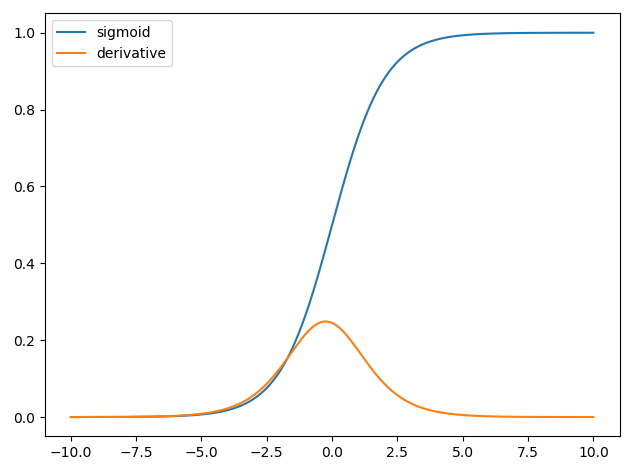  
A number of activation functions are commonly used in neural networks. The most important of these are the sigmoid, relu, tanh, and softmax activation functions. Here are some short reference articles on them:  
https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253  
https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6

## Training a neural network  
Training is the process of iteratively finding the optimal value of weights and bias for each neuron in the network, i.e. the values that minimize the loss function. The methods used in training are called gradient descent and back-propagation and will be discussed in the next module.

# The Keras Sequential API

The keras sequential api allows you to easily build, compile, fit, and evaluate your own neural network models.

## Overview  
"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. Use Keras if you need a deep learning library that:  

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility). Supports both convolutional networks and recurrent networks, as well as combinations of the two. Runs seamlessly on CPU and GPU."

## Example: the XOR problem  
In computer science, XOR is a logical operation called "exclusive or." For two logical inputs a and b, a XOR b has the same outputs as a OR b, with the exception that if both inputs are true, the output is false.

In [3]:
import pandas as pd
data = {"x1": [0, 1, 0, 1],
        "x2": [0, 0, 1, 1],
        "y": [0, 1, 1, 0]}
df = pd.DataFrame.from_dict(data).astype("int")
X = df[["x1", "x2"]].values
y = df["y"].values

XOR truth table: inputs are x1 and x2, output is y

In [31]:
df.head()

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


We can think of XOR as a binary classification problem.

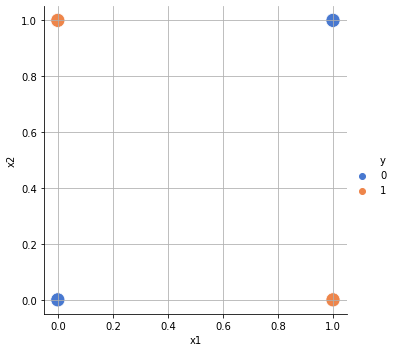

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# notice that we can't just draw a line to separate the two classes
sns.relplot(x="x1", y="x2", hue="y",
            sizes=(40, 400), alpha=1, palette="muted",s=200,
            height=5,  data=df);
plt.grid()

# Let's try to solve the XOR problem  
Our first approach will be to use a perceptron model to predict the output y given the inputs x1 and x2.

In [5]:
#!pip install tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# build a perceptron with keras
# The perceptron can't get to 100% accuracy because it can only 
# fit linear boundaries between classes
# instantiate a sequential model
model = Sequential()
# add a dense layer with some layer-specific hyperparameters
model.add(Dense(1, # 1 neuron in the hidden layer
                input_dim = 2, # input_dim is the only place where we say anything about the input layer
                activation = "sigmoid")) # selecting our activation function
# compile the model
# locks the model architecture
# indicate network-level hyperparameters
model.compile(loss = "binary_crossentropy", # we're doing binary classification
              optimizer = "sgd", #stochastic gradient descent
              metrics = ["accuracy"])
# fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 252ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7084 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7082 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7081 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7080 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7080 - accuracy: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7079 - accuracy: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7078 - accuracy: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7077 - accuracy: 0.2500
Epoch 11/100
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.2500
Epoch 85/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7026 - accuracy: 0.2500
Epoch 86/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7026 - accuracy: 0.2500
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7025 - accuracy: 0.2500
Epoch 88/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7025 - accuracy: 0.2500
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.2500
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.2500
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.2500
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.2500
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.2500
Epoch 94/100
1/1 [===============

What went wrong?  
The perceptron model cannot do the job because the classes in this problem cannot be separated with a line.  
A perceptron model with a sigmoid function is equivalent to logistic regression, which is a linear model.

# Try again to solve the XOR problem  
This time we'll use a multilayer perceptron model.

In [6]:
%%time
# this is a deep neural network with multiple hidden layers
# deep neural networks are any NNs with more than one hidden layer
# instantiate a sequential model
model = Sequential()
# add a dense layer
# with some layer-specific hyperparameters
model.add(Dense(10,
                input_dim = 2, # input_dim is the only place where we say anything about the input layer
                activation = "relu"))
model.add(Dense(8, activation = "relu")) # selecting activation function
model.add(Dense(5, activation = "relu"))
# output layer with sigmoid function for binary classification
model.add(Dense(1, activation = "sigmoid"))
# compile the model
# locks the model architecture
# indicate network-level hyperparameters
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
# fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 305ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.7500
Epoch 11/100
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.7500
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.7500
Epoch 86/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.7500
Epoch 87/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.7500
Epoch 88/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.7500
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.7500
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6808 - accuracy: 0.7500
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.7500
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.7500
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.7500
Epoch 94/100
1/1 [===============

In [7]:
# evaluate the model
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

1/1 [==============================] - 0s 115ms/step - loss: 0.6779 - accuracy: 0.7500
accuracy: 75.0


In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


# Follow Along: Neural network modeling workflow with the keras sequential API

In the keras sequential api, you specify a model architecture by sequentially adding layers. This type of architecture works well for feed forward neural networks in which the data flows in one direction (forward propagation) and the error flows in the opposite direction (backwards propagation). The keras sequential api follows a standardized workflow to estimate a neural network model:  
1. Load data.  
2. Define Model.  
3. Compile model.  
4. Fit model.  
5. Plot metrics.  
6. Evaluate model.  
7. Get predictions for the test data.  

You saw these steps in the perceptron examples above, but let's walk through each in more detail.

## MNIST digit classification  
As our next example of neural networks, we will use a multilayer perceptron (MLP) model to solve the famous MNIST digit classification problem. The MNIST database is a publicly available collection of 60,000 images, each of which contains a single handwritten decimal digit (0-9). The ten digit classes are roughly equally represented. We want to train a model that can classify each image into the correct digit class.  

## Load data

In [9]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [10]:
# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


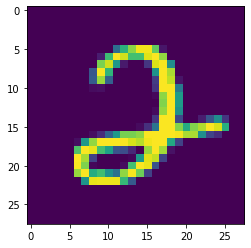

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[16])

# Each pixel has a value that is represented by 8 bits

The maximum value that can be stored in 8 bits is 2^8 - 1 = 255

In [12]:
# normalize the pixel values by dividing by the max value
max_value = 255
X_train = X_train.astype("float32") / max_value
X_test = X_test.astype("float32") / max_value

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
# flatten image
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [16]:
X_train.shape

(60000, 784)

In [17]:
y_train.shape

(60000,)

In [18]:
y_train[16]

2

In [19]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Build the Neural Network Model

In [20]:
from tensorflow.keras import Sequential

We instantiate a Sequential model. We'll then build the model's architecture one layer at a time.  

In [21]:
model = Sequential()

We construct our neural network model by adding perceptron layers one at a time. Networks composed of perceptron layers in which each neuron connects to all the neurons in the previous layer and to all the neurons in the next layer are also called "fully-connected", "dense", or "densely-connected" layers.  
When building a perceptron layer in keras, the first argument specifies how many neurons we want to have in that layer. We'll create an "input" layer for this problem using 32 neurons. The second argument specifies the type of activation function to use. Here we'l use the relu activation function. The third argument specifies the number of inputs in the layer. In the MNIST data set, each input is a flattened 28x28 image, so there are 784 = 28 * 28 inputs coming into this layer from our dataset image.

In [22]:
# start with an initial layer of 32 neurons
# the number of neurons in a layer is also the number of outputs
# Note: neural network layers before the output layer are often referred to
# as "hidden" layers)
model.add(Dense(32, activation = "relu", input_dim = 784))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


We want the second layer to combine its inputs (which, remember, are the outputs of the neurons in the first layer) to compute a set of 10 outputs. Why 10? One for each digit class, 0-9! Using the softmax function creates 10 outputs representing the respective probabilities that the image corresponds to each digit. i.e. the third and fourth outputs are the probabilities that the handwritten digit in the image is a 2 or 9, respectively. So our neural network doesn't actually classify an image, instead, it computes a set of probabilities over the 10 output digit classes. Of course, the 10 probabilities sum to 1. We can then easily add a final layer to classify each image by picking the digit class with the highest probability.

In [23]:
# add an output layer with a softmax activation function
# Sequential() knows that the inputs to this layer are the outputs from
# the previous layer, so we don't have to specify the number of inputs
model.add(Dense(10, activation = "softmax"))

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Compile the Neural Network Model  
When compiling a model in keras, there are three inputs to specify: the optimizer, the loss function, and the metric.  
## The loss function  
The loss function is a special function quantifying the error between the targets y from the training data and the network's predicted targets. We train the network to minimize the loss function, meaning to make the prediction error as small as possible.  
In a binary classification system, we would use the binary_cross_entropy loss function. For more than two categories, the appropriate loss function is sparse_categorical_crossentropy when the targets are expressed as integers, or categorical_crossentropy when the targets are one-hot-encoded.

## Training a neural network  
Training a network entails finding the optimal values of the weights and biases of all the neurons, i.e. the values that lead to the lowest prediction error. This is usually done via some variation on the basic methods of gradient descent and back-propagation.  
## The metric  
The metric is the number we wish to use to gauge the performance of our model. In this case, we specify that we want to report model accuracy as our metric for each epoch. An epoch is a complete training run that uses either a subset of the data (a mini-batch), or all the data. In training neural networks, we usually run through multiple epochs until the performance stops improving. We will also be able to see the overall accuracy once the model has finished training.

## The Optimizer   
The optimizer chooses which method to use in training the model. There are many optimizers in keras, but the adam optimizer usually gives the best performance. Best practice is to just use Adam.  
additional references on Adam:  
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/   
https://arxiv.org/abs/1412.6980

In [25]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

## Fit the model

Let's train the MNIST neural network model that we just built to predict the digit classes. model.fit() has a batch_size parameter that we can use if we want to do mini-batch epochs, but since this tabular dataset is pretty small we'll use the default value batch_size = None so that each epoch will consist of the entire batch of input data.

In [26]:
history = model.fit(X_train,
                   y_train,
                   epochs = 5,
                   validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.9062 - val_loss: 0.2114 - val_accuracy: 0.9398
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1839 - accuracy: 0.9471 - val_loss: 0.1623 - val_accuracy: 0.9524
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1468 - accuracy: 0.9576 - val_loss: 0.1382 - val_accuracy: 0.9575
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1241 - accuracy: 0.9633 - val_loss: 0.1365 - val_accuracy: 0.9581
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1080 - accuracy: 0.9678 - val_loss: 0.1235 - val_accuracy: 0.9624


## Plot the learning curves  
Accuracy vs Epoch and loss vs epoch

In [27]:
type(history)

keras.callbacks.History

In [28]:
history.history

{'loss': [0.3403976559638977,
  0.18389958143234253,
  0.14684106409549713,
  0.12414169311523438,
  0.10802511870861053],
 'accuracy': [0.9061999917030334,
  0.9470666646957397,
  0.9575666785240173,
  0.9632666707038879,
  0.9677500128746033],
 'val_loss': [0.21141789853572845,
  0.16233091056346893,
  0.13822171092033386,
  0.13647541403770447,
  0.12352337688207626],
 'val_accuracy': [0.9398000240325928,
  0.9524000287055969,
  0.9574999809265137,
  0.9581000208854675,
  0.9624000191688538]}

Text(0.5, 1.0, 'loss')

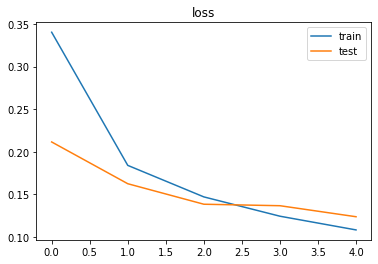

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
epochs = [i for i in range(len(history.history["loss"]))]
sns.lineplot(x = epochs, y = history.history["loss"], label = "train")
sns.lineplot(x = epochs, y = history.history["val_loss"], label = "test")
plt.title("loss")

## Evaluate the model  
The model.evaluate() function computes the loss and metric values for the input data and labels.

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1235 - accuracy: 0.9624


[0.12352337688207626, 0.9624000191688538]

## Get model predictions on the test data  
To see what a model prediction looks like, use the model.predict() method.  

In [31]:
print(f'Model outputs are class probabilities from the softmax activation function:\n {model.predict(X_test[0:1])}')
print(f'\nSum of the class probabilities: {model.predict(X_test[0:1]).sum()}')
print(f'\nPredicted label: {model.predict(X_test[0:1]).argmax()}')
print(f'\nTrue label: {y_test[0]}')

Model outputs are class probabilities from the softmax activation function:
 [[1.4501419e-05 6.5990755e-09 2.3280179e-04 9.4715608e-03 9.8674073e-09
  1.6131915e-05 1.1400591e-12 9.9012125e-01 3.0036019e-06 1.4074605e-04]]

Sum of the class probabilities: 1.0

Predicted label: 7

True label: 7


In [32]:
predictions = model.predict(X_test)

Get class predictions for the whole testing set.

array([[1.4501391e-05, 6.5990626e-09, 2.3280157e-04, ..., 9.9012125e-01,
        3.0036019e-06, 1.4074593e-04],
       [5.8122052e-05, 9.5872951e-05, 9.9626428e-01, ..., 2.6676492e-10,
        5.5500554e-05, 3.1488039e-13],
       [4.0179060e-07, 9.9632013e-01, 1.2240288e-03, ..., 6.8840029e-04,
        1.4092933e-03, 6.0858565e-06],
       ...,
       [3.7639481e-08, 6.8725865e-11, 4.5797761e-09, ..., 3.0964020e-06,
        5.4999578e-05, 6.4809578e-03],
       [1.2231156e-07, 4.8575428e-09, 1.9092063e-08, ..., 6.1618863e-07,
        6.6934439e-04, 6.8572659e-09],
       [1.3092881e-05, 1.2477090e-10, 4.4034150e-06, ..., 1.3030775e-12,
        1.2550898e-09, 5.3767624e-10]], dtype=float32)